<a href="https://colab.research.google.com/github/tazar09/heroes_3/blob/main/h3_castles%5Bsep30%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_rows', 500)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [2]:
list_of_castles = ['Castle', 'Rampart', 'Tower', 'Inferno', 'Necropolis', 'Dungeon', 'Stronghold', 'Fortress', 'Conflux']
url = 'https://heroes.thelazy.net/index.php/'

In [3]:
url_castles = []
for x in list_of_castles:
  url_castles.append(url + x)
url_castles

['https://heroes.thelazy.net/index.php/Castle',
 'https://heroes.thelazy.net/index.php/Rampart',
 'https://heroes.thelazy.net/index.php/Tower',
 'https://heroes.thelazy.net/index.php/Inferno',
 'https://heroes.thelazy.net/index.php/Necropolis',
 'https://heroes.thelazy.net/index.php/Dungeon',
 'https://heroes.thelazy.net/index.php/Stronghold',
 'https://heroes.thelazy.net/index.php/Fortress',
 'https://heroes.thelazy.net/index.php/Conflux']

In [4]:
dfs = []
for i, x in enumerate(url_castles):
  match_castle = str(list_of_castles[i]) + ' ' + 'creatures'
  df = pd.read_html(x, match = match_castle)
  dfs.append(df)

PART 1 - Creating the dataframe

1. Castle

In [5]:
df_castle = pd.DataFrame(dfs[0][0])
df_castle.columns = df_castle.columns.droplevel()
df_castle['Town'] = 'Castle'

2. Rampart

In [6]:
df_rampart = pd.DataFrame(dfs[1][0])
df_rampart.columns = df_rampart.columns.droplevel()
df_rampart['Town'] = 'Rampart'

3. Tower

In [7]:
df_tower = pd.DataFrame(dfs[2][0])
df_tower.columns = df_tower.columns.droplevel()
df_tower['Town'] = 'Tower'

4. Inferno

In [8]:
df_inferno = pd.DataFrame(dfs[3][0])
df_inferno.columns = df_inferno.columns.droplevel()
df_inferno['Town'] = 'Inferno'

5. Necropolis

In [9]:
df_necropolis = pd.DataFrame(dfs[4][0])
df_necropolis.columns = df_necropolis.columns.droplevel()
df_necropolis['Town'] = 'Necropolis'

6. Dungeon

In [10]:
df_dungeon = pd.DataFrame(dfs[5][0])
df_dungeon.columns = df_dungeon.columns.droplevel()
df_dungeon['Town'] = 'Dungeon'
# df_dungeon.drop('', axis = 1, inplace = True)

7. Stronghold

In [11]:
url2 = 'https://heroes.thelazy.net/index.php/Stronghold'
df_stronghold = pd.read_html(url2, match = 'Fortress creatures')
df_stronghold = pd.DataFrame(df_stronghold[0])
df_stronghold.columns = df_stronghold.columns.droplevel()
df_stronghold['Town'] = 'Stronghold'

8. Fortress

In [12]:
df_fortress = pd.DataFrame(dfs[7][0])
df_fortress.columns = df_fortress.columns.droplevel()
df_fortress['Town'] = 'Fortress'

9. Conflux

In [13]:
df_conflux = pd.DataFrame(dfs[8][0])
df_conflux.columns = df_conflux.columns.droplevel()
df_conflux['Town'] = 'Conflux'

10. Cove

In [189]:
url2 = 'https://heroes.thelazy.net/index.php/Cove'
df_cove = pd.read_html(url2, match = 'Cove creatures')
df_cove = pd.DataFrame(df_cove[0])
df_cove.columns = df_cove.columns.droplevel()
df_cove['Town'] = 'Cove'
df_cove.loc[6, 'Lvl'] = "3+"
#exclusion of first level 3 creature for uniformization
df_cove.drop(index = 4, axis = 0, inplace = True)
df_cove = df_cove.reset_index(drop = True)
df_cove.loc[4, 'Lvl'] = '3'
# df_cove.head(20)

Generating the column with cumulative Values for Upgraded Creatures.

In [254]:
def cumsum(df):
  df['val_temp'] = df.index % 2 * df['Val']
  df['cum_val'] = df['val_temp'].cumsum()
  df = df.drop('val_temp', axis =1, inplace=True)
  return df

In [ ]:
for df in [df_castle, df_rampart, df_tower, df_inferno, df_necropolis, df_dungeon, df_stronghold, df_fortress, df_conflux, df_cove]:
  cumsum(df)

________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________

All castles joined

In [375]:
df_towns = pd.concat([df_castle, df_rampart, df_tower, df_inferno, df_necropolis, df_dungeon, df_stronghold, df_fortress, df_conflux, df_cove] , axis = 0)

Preprocessing

In [376]:
df_towns['Level'] = df_towns['Lvl'].str.replace('+', '.5').str.replace('*', '')
df_towns['Level'] = df_towns['Level'].astype(float)
df_towns.drop('Lvl', axis = 1, inplace = True)

In [377]:
df = df_towns[['Name', 'Town', 'Level', 'Att', 'Def', 'D-', 'D+', 'HP', 'Spd', 'Grw', 'Val','cum_val','Cost', 'Unnamed: 12_level_1', 'Special']]
df['Unnamed: 12_level_1'] = df['Unnamed: 12_level_1'].fillna('0')
df['Special'] = df['Special'].fillna('No')
df = df.rename(columns={'Unnamed: 12_level_1':'Resource'})
df['Resource'] = df['Resource'].str.get(-1).astype(int)
df['Ranged'] = df['Special'].apply(lambda x:
                                   1 if 'Ranged' in x else
                                   0)
df['Flyer'] = df['Special'].apply(lambda x:
                                  1 if 'Fly' in x or 'Teleporting' in x or 'Teleport' in x else
                                  0)
df['no_retaliation'] = df['Special'].apply(lambda x:
                                           1 if 'No enemy retaliation' in x else
                                           (0.2 if any(s in x for s in ['Petrify', 'Paralyze']) else
                                           0))
df['Upgraded'] = df['Level'].apply(lambda x:
                                   1 if ((x / 0.5)%2 == 1) else
                                   0)

________________________________________________________________________________________________________________________________

Adding AI value and Fight Value

In [378]:
path_sod = '/content/h3_ai_value_sod.xlsx'
path_hoa = '/content/h3_ai_value_hoa.xlsx'

df_ai_value_sod = pd.read_excel(path_sod)
df_ai_value_hoa = pd.read_excel(path_hoa)

In [379]:
df_ai_value_sod['Creature'] = df_ai_value_sod['Creature'].str.strip()
df_ai_value_hoa['Creature'] = df_ai_value_hoa['Creature'].str.strip()
df = df.merge(df_ai_value_hoa, how = 'left', left_on = 'Name', right_on = 'Creature')

In [380]:
df.tail(5)

,Name,Town,Level,Att,Def,D-,D+,HP,Spd,Grw,...,Cost,Resource,Special,Ranged,Flyer,no_retaliation,Upgraded,Creature,AI Value,Fight Value
135,Sorceress,Cove,5.5,12,9,10,16,35,7,3,...,565,0,"Ranged (12 shots), Casts Weakness / Disrupting...",1,0,0.0,1,Sorceress,852,655
136,Nix,Cove,6.0,13,16,18,22,80,6,2,...,1000,0,Ignores 30% of enemy attack value,0,0,0.0,0,Nix,1415,1415
137,Nix Warrior,Cove,6.5,14,17,18,22,90,7,2,...,1300,0,Ignores 60% of enemy attack value,0,0,0.0,1,Nix Warrior,2116,1763
138,Sea Serpent,Cove,7.0,22,16,30,55,180,9,1,...,2200,1,Poisonous,0,0,0.0,0,Sea Serpent,3953,3162
139,Haspid,Cove,7.5,29,20,30,55,300,12,1,...,4000,2,"Poisonous, Revenge",0,0,0.0,1,Haspid,7220,5554


_________________________________________________________________________________________________________________

We used Horn of the Abyss Ai value and Fight Value, because Shadow of Death did not have records for Cove units. However, we displayed the differences in the following lines.

In [381]:
df_merged = df_ai_value_sod.merge(df_ai_value_hoa, on = 'Creature', how = 'left')

In [382]:
df_merged['AI_dif'] = df_merged['AI Value_y'] - df_merged['AI Value_x']
df_merged['Fight_dif'] = df_merged['Fight Value_y'] - df_merged['Fight Value_x']
df_diff = df_merged[(df_merged['AI_dif'] != 0) | (df_merged['Fight_dif'] != 0)].head(500)

In [383]:
df_diff.head(20)

,Creature,AI Value_x,Fight Value_x,AI Value_y,Fight Value_y,AI_dif,Fight_dif
3,Faerie Dragon,19580,16317,30501,16317,10921,0
17,Firebird,4547,3248,4336,3097,-211,-151
30,Efreet Sultan,1848,1584,2343,1802,495,218
76,Monk,485,485,582,485,97,0
93,Nomad,345,285,345,415,0,130


In [384]:
print('There were only {} differences. There where {} neutral creatures, and {} factions\' creatures. \nRegarding the towns\' changes, we note the {}, {} and {}.\nSo, we will keep the HoA scores.' \
      .format(df_diff.shape[0], df_diff.loc[[3,93]].shape[0], df_diff.loc[[17,30,76]].shape[0], df_diff.loc[17, 'Creature'], df_diff.loc[30, 'Creature'], df_diff.loc[76, 'Creature']))

There were only 5 differences. There where 2 neutral creatures, and 3 factions' creatures. 
Regarding the towns' changes, we note the Firebird, Efreet Sultan and Monk.
So, we will keep the HoA scores.


________________________________________________________________________________________________________

In [385]:
df0 = df.drop(['Creature'], axis = 1)

In [386]:
df0.head()

,Name,Town,Level,Att,Def,D-,D+,HP,Spd,Grw,...,cum_val,Cost,Resource,Special,Ranged,Flyer,no_retaliation,Upgraded,AI Value,Fight Value
0,Pikeman,Castle,1.0,4,5,1,3,10,4,14,...,0,60,0,Immune to jousting,0,0,0.0,0,80,100
1,Halberdier,Castle,1.5,6,5,2,3,10,5,14,...,115,75,0,Immune to jousting,0,0,0.0,1,115,115
2,Archer,Castle,2.0,6,3,2,3,10,4,9,...,115,100,0,Ranged (12 shots),1,0,0.0,0,126,115
3,Marksman,Castle,2.5,6,3,2,3,10,6,9,...,299,150,0,"Ranged (24 shots), Double attack",1,0,0.0,1,184,115
4,Griffin,Castle,3.0,8,8,3,6,25,6,7,...,299,200,0,"Flying, Two retaliations",0,1,0.0,0,351,324


In [387]:
df = df0.copy()

End of first part: df0 is the starting dataframe

_____________


___________

__________________________________________________________________________________________________________________________________________________________

PART II - Preprocessing and enhancing the data

Enhancing the data with special ability modelling: multiple attacks, magic immunity/resistance, spell casting etc.

1. Multiple attacks column

In [388]:
df['multi_att'] = df['Special'].apply(lambda x:
                                      1 if 'Double attack' in x or 'Ferocity' in x else
                                      0.5 if 'all adjacent' in x else
                                      0.3 if any(item in x for item in ['Breath attack', '3-headed attack', 'Death blow', 'Unlimited', 'Fireball attack', 'Death cloud'])
                                      else 0)

Checking the results


In [389]:
words = ['Double', 'Breath', 'Ferocity', 'adjacent', '3-headed', 'Death blow', 'Unlimited', 'Fireball attack', 'Death cloud']
pattern = '|'.join(words)
mask = df['Special'].str.contains(pattern)
df[mask]

,Name,Town,Level,Att,Def,D-,D+,HP,Spd,Grw,...,Cost,Resource,Special,Ranged,Flyer,no_retaliation,Upgraded,AI Value,Fight Value,multi_att
3,Marksman,Castle,2.5,6,3,2,3,10,6,9,...,150,0,"Ranged (24 shots), Double attack",1,0,0.0,1,184,115,1.0
5,Royal Griffin,Castle,3.5,9,9,3,6,25,9,7,...,240,0,"Flying, Unlimited retaliations",0,1,0.0,1,448,364,0.3
7,Crusader,Castle,4.5,12,12,7,10,35,6,4,...,400,0,Double attack,0,0,0.0,1,588,588,1.0
19,Grand Elf,Rampart,3.5,9,5,3,5,15,7,7,...,225,0,"Ranged (24 shots), Double attack",1,0,0.0,1,331,195,1.0
26,Green Dragon,Rampart,7.0,18,18,40,50,180,10,1,...,2400,1,"Dragon, Flying, Breath attack, 1-3 lvl spells ...",0,1,0.0,0,4872,3654,0.3
27,Gold Dragon,Rampart,7.5,27,27,40,50,250,16,1,...,4000,2,"Dragon, Flying, Breath attack, 1-4 lvl spells ...",0,1,0.0,1,8613,6220,0.3
45,Magog,Inferno,2.5,7,4,2,4,13,6,8,...,175,0,"Ranged (24 shots), Fireball attack",1,0,0.0,1,240,210,0.3
47,Cerberus,Inferno,3.5,10,8,2,7,25,8,5,...,250,0,"No enemy retaliation, 3-headed attack",0,0,1.0,1,392,308,0.3
64,Lich,Necropolis,5.0,13,10,11,13,30,6,3,...,550,0,"Ranged (12 shots), Undead, Death cloud",1,0,0.0,0,848,742,0.3
65,Power Lich,Necropolis,5.5,13,10,11,15,40,7,3,...,600,0,"Ranged (24 shots), Undead, Death cloud",1,0,0.0,1,1079,889,0.3


___________________________________________________________________________
2. Poisonous, aging, disease and similar effects.


In [390]:
df['poison'] = df['Special'].apply(lambda x:
                                      1 if 'Poison' in x or 'Disease' in x or 'Aging' in x
                                      else 0)

Checking the results.

In [391]:
words_poison = ['Poison', 'Disease', 'Aging']
pattern_poison = '|'.join(words_poison)
mask = df['Special'].str.contains(pattern_poison)
df[mask]

,Name,Town,Level,Att,Def,D-,D+,HP,Spd,Grw,...,Resource,Special,Ranged,Flyer,no_retaliation,Upgraded,AI Value,Fight Value,multi_att,poison
59,Zombie,Necropolis,2.5,5,5,2,3,20,4,8,...,0,"Undead, Disease",0,0,0.0,1,128,160,0.0,1
69,Ghost Dragon,Necropolis,7.5,19,17,25,50,200,14,1,...,1,"Dragon, Undead, Flying, Morale -1, Aging",0,1,0.0,1,4696,3228,0.0,1
109,Wyvern Monarch,Fortress,6.5,14,14,18,22,70,11,2,...,0,"Flying, Poison",0,1,0.0,1,1518,1518,0.0,1
138,Sea Serpent,Cove,7.0,22,16,30,55,180,9,1,...,1,Poisonous,0,0,0.0,0,3953,3162,0.0,1
139,Haspid,Cove,7.5,29,20,30,55,300,12,1,...,2,"Poisonous, Revenge",0,0,0.0,1,7220,5554,0.0,1


___________________________________________________________________________
3. Immunity to some sort of spells.

In [392]:
df['immunity'] = df['Special'].apply(lambda x:
                                     1 if ' Magic immunity' in x else
                                     0.75 if '1-4 lvl spells immunity' in x else
                                     0.5 if  '1-3 lvl spells immunity' in x else
                                     0.25 if 'Fire immunity' in x else
                                     0.10 if (any(item in x for item in ['Immunity to Mind spells', 'Elemental', 'Unliving', 'Undead']) & ('Magic immunity' not in x)) else
                                     0.03 if any(item in x for item in ['Immune to jousting', 'Immune to Blinding', 'Immune to ice'])
                                     else 0)

Checking the results

In [393]:
words_immune = ['Immune', 'Immunity', 'immunity', 'Unliving', 'Undead']
pattern_immune = '|'.join(words_immune)
mask2 = df['Special'].str.contains(pattern_immune)
df[mask2].head(5)

,Name,Town,Level,Att,Def,D-,D+,HP,Spd,Grw,...,Special,Ranged,Flyer,no_retaliation,Upgraded,AI Value,Fight Value,multi_att,poison,immunity
0,Pikeman,Castle,1.0,4,5,1,3,10,4,14,...,Immune to jousting,0,0,0.0,0,80,100,0.0,0,0.03
1,Halberdier,Castle,1.5,6,5,2,3,10,5,14,...,Immune to jousting,0,0,0.0,1,115,115,0.0,0,0.03
26,Green Dragon,Rampart,7.0,18,18,40,50,180,10,1,...,"Dragon, Flying, Breath attack, 1-3 lvl spells ...",0,1,0.0,0,4872,3654,0.3,0,0.50
27,Gold Dragon,Rampart,7.5,27,27,40,50,250,16,1,...,"Dragon, Flying, Breath attack, 1-4 lvl spells ...",0,1,0.0,1,8613,6220,0.3,0,0.75
30,Stone Gargoyle,Tower,2.0,6,6,2,3,16,6,9,...,"Unliving, Flying",0,1,0.0,0,165,150,0.0,0,0.10


___________________________________________________________________________________________________
3. Magic resistance or spell eater.

In [394]:
words_resistance = ['Resistance', 'resistance', 'resistant', 'Resists', 'resists', 'Magic damper', 'Mana drain', 'Spells cost -2 sp', 'Magic channel']
pattern_resistance = '|'.join(words_resistance)
mask_resistance = df['Special'].str.contains(pattern_resistance)
df[mask_resistance]

,Name,Town,Level,Att,Def,D-,D+,HP,Spd,Grw,...,Special,Ranged,Flyer,no_retaliation,Upgraded,AI Value,Fight Value,multi_att,poison,immunity
16,Dwarf,Rampart,2.0,6,7,2,4,20,3,8,...,Resistance +20%,0,0,0.0,0,138,194,0.0,0,0.0
17,Battle Dwarf,Rampart,2.5,7,7,2,4,20,5,8,...,Resistance +40%,0,0,0.0,1,209,209,0.0,0,0.0
20,Pegasus,Rampart,4.0,9,8,5,9,30,8,5,...,"Flying, Magic damper",0,1,0.0,0,518,407,0.0,0,0.0
21,Silver Pegasus,Rampart,4.5,9,10,5,9,30,12,5,...,"Flying, Magic damper",0,1,0.0,1,532,418,0.0,0,0.0
24,Unicorn,Rampart,6.0,15,14,18,22,90,7,2,...,"Blind, Aura of Resistance +20%",0,0,0.0,0,1806,1548,0.0,0,0.0
25,War Unicorn,Rampart,6.5,15,14,18,22,110,9,2,...,"Blind, Aura of Resistance +20%",0,0,0.0,1,2030,2030,0.0,0,0.0
32,Stone Golem,Tower,3.0,7,10,4,5,30,3,6,...,"Unliving, Spell Damage Resistance +50%",0,0,0.0,0,250,339,0.0,0,0.1
33,Iron Golem,Tower,3.5,9,10,4,5,35,5,6,...,"Unliving, Spell Damage Resistance +75%",0,0,0.0,1,412,412,0.0,0,0.1
34,Mage,Tower,4.0,11,8,7,9,25,5,4,...,"Ranged (24 shots), No melee penalty, No obstac...",1,0,0.0,0,570,418,0.0,0,0.0
35,Arch Mage,Tower,4.5,12,9,7,9,30,7,4,...,"Ranged (24 shots), No melee penalty, No obstac...",1,0,0.0,1,680,467,0.0,0,0.0


In [395]:
df['resistance'] = df['Special'].apply(lambda x:
                                      1 if any(s in x for s in ['Resistance', 'resistance', 'resistant',
                                                                'Resists', 'resists', 'Magic damper',
                                                                'Mana drain', 'Spells cost -2 sp', 'Magic channel'])
                                      else 0)

#must be revisited, not proper

Caster column

In [396]:
words_caster = ['Cast', 'cast', 'Weakness', 'Dispel', 'Curse', 'Spellcaster', 'Resurrect', 'shield']
pattern_caster = '|'.join(words_caster)
mask_caster = df['Special'].str.contains(pattern_caster)
df[mask_caster]

,Name,Town,Level,Att,Def,D-,D+,HP,Spd,Grw,...,Ranged,Flyer,no_retaliation,Upgraded,AI Value,Fight Value,multi_att,poison,immunity,resistance
13,Archangel,Castle,7.5,30,30,50,50,250,18,1,...,0,1,0.0,1,8776,6033,0.0,0,0.00,0
37,Master Genie,Tower,5.5,12,12,13,16,40,11,3,...,0,1,0.0,1,942,748,0.0,0,0.00,0
53,Efreet Sultan,Inferno,6.5,16,14,16,24,90,13,2,...,0,1,0.0,1,2343,1802,0.0,0,0.25,0
59,Zombie,Necropolis,2.5,5,5,2,3,20,4,8,...,0,0,0.0,1,128,160,0.0,1,0.10,0
66,Black Knight,Necropolis,6.0,16,16,15,30,120,7,2,...,0,0,0.0,0,2087,1753,0.0,0,0.10,0
67,Dread Knight,Necropolis,6.5,18,18,15,30,120,9,2,...,0,0,0.0,1,2382,2029,0.3,0,0.10,0
91,Ogre Mage,Stronghold,4.5,13,7,6,12,60,5,4,...,0,0,0.0,1,672,672,0.0,0,0.00,0
102,Serpent Fly,Fortress,3.0,7,9,2,5,20,9,8,...,0,1,0.0,0,268,215,0.0,0,0.00,0
103,Dragon Fly,Fortress,3.5,8,10,2,5,20,13,8,...,0,1,0.0,1,312,250,0.0,0,0.00,0
115,Storm Elemental,Conflux,2.5,9,9,2,8,25,8,6,...,1,0,0.0,1,486,324,0.0,0,0.10,0


In [397]:
df['caster'] = df['Special'].apply(lambda x: 1 if any(s in x for s in ['Cast', 'cast', 'Weakness', 'Dispel', 'Curse', 'Spellcaster', 'Resurrect', 'shield'])
                                              else 0)

In [398]:
#CASTLES COSTS

In [399]:
# url1 = 'https://heroes.thelazy.net/index.php/Cove'
# df_resource1 = pd.read_html(url1)
# df_resource2 = df_resource1[1]
# resource = ['gold', 'wood', 'ore', 'crystal', 'gem', 'sulfur', 'mercury', 'troop cost']
# df_resource2['Resource'] = resource
# df_resource2

End of the first part of the project

Executing some EDA and configure the data

In [400]:
df.head()

,Name,Town,Level,Att,Def,D-,D+,HP,Spd,Grw,...,Flyer,no_retaliation,Upgraded,AI Value,Fight Value,multi_att,poison,immunity,resistance,caster
0,Pikeman,Castle,1.0,4,5,1,3,10,4,14,...,0,0.0,0,80,100,0.0,0,0.03,0,0
1,Halberdier,Castle,1.5,6,5,2,3,10,5,14,...,0,0.0,1,115,115,0.0,0,0.03,0,0
2,Archer,Castle,2.0,6,3,2,3,10,4,9,...,0,0.0,0,126,115,0.0,0,0.00,0,0
3,Marksman,Castle,2.5,6,3,2,3,10,6,9,...,0,0.0,1,184,115,1.0,0,0.00,0,0
4,Griffin,Castle,3.0,8,8,3,6,25,6,7,...,1,0.0,0,351,324,0.0,0,0.00,0,0


Preparing the columns

In [401]:
df['dmg'] = (df['D+'] + df['D-'])/2
df['attdef'] = (df['Att'] + df['Def'])/2
df['diff_'] = round(((df['AI Value'] - df['Fight Value'])/df['Fight Value'])*100,0).astype(int)

In [402]:
df.head()

,Name,Town,Level,Att,Def,D-,D+,HP,Spd,Grw,...,AI Value,Fight Value,multi_att,poison,immunity,resistance,caster,dmg,attdef,diff_
0,Pikeman,Castle,1.0,4,5,1,3,10,4,14,...,80,100,0.0,0,0.03,0,0,2.0,4.5,-20
1,Halberdier,Castle,1.5,6,5,2,3,10,5,14,...,115,115,0.0,0,0.03,0,0,2.5,5.5,0
2,Archer,Castle,2.0,6,3,2,3,10,4,9,...,126,115,0.0,0,0.00,0,0,2.5,4.5,10
3,Marksman,Castle,2.5,6,3,2,3,10,6,9,...,184,115,1.0,0,0.00,0,0,2.5,4.5,60
4,Griffin,Castle,3.0,8,8,3,6,25,6,7,...,351,324,0.0,0,0.00,0,0,4.5,8.0,8


Show me the castles with the highest percentange change between AI Value and Fight Value.

<Axes: title={'center': 'Overall difference between AI and Fight Value per town'}, ylabel='Town'>

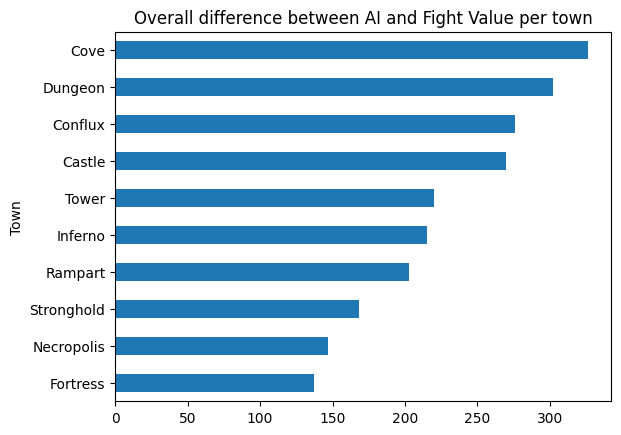

In [403]:
df.groupby('Town')['diff_'].sum().sort_values(ascending = True).plot(kind = 'barh', title = 'Overall difference between AI and Fight Value per town')

Text(0.5, 1.0, 'Correlation matrix')

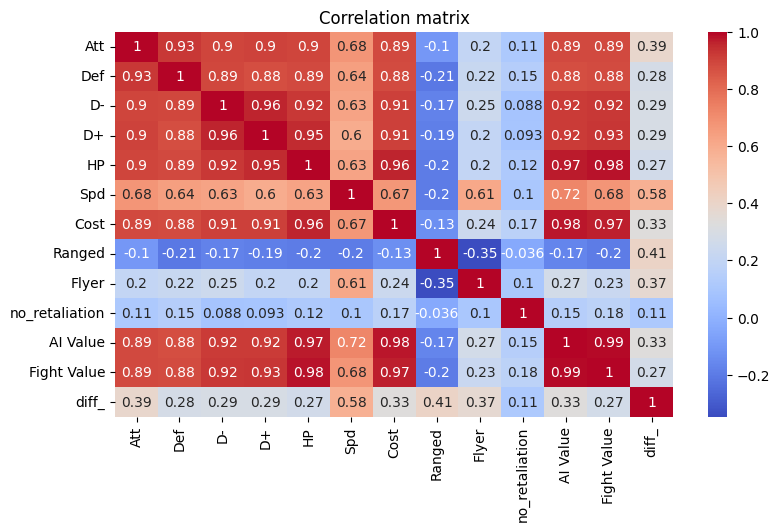

In [404]:
dfa = df[['Name', 'Att', 'Def', 'D-', 'D+', 'HP', 'Spd', 'Cost', 'Ranged', 'Flyer',
       'no_retaliation', 'AI Value', 'Fight Value', 'diff_']]
corr_matrix = dfa.corr(method = 'pearson')
plt.figure(figsize = (9, 5))
sns.heatmap(corr_matrix, annot = True, cmap = 'coolwarm')
plt.title('Correlation matrix')

We can see that Speed, Ranged and Flyer are the most important in explaining the difference between AI value and Fight Value. Hope this will be shown in the linear regression.

In [405]:
dftest = df[df['Upgraded'] == 1]

In [406]:
dftest['val_per_gold'] = round(dftest['Val']/dftest['Cost'], 2)
dftest['total_value'] = dftest['Val'] * dftest['Grw']
dftest['total_val_per_gold'] = round(dftest['total_value']/dftest['Cost'], 2)

In [407]:
dftest.head()

,Name,Town,Level,Att,Def,D-,D+,HP,Spd,Grw,...,poison,immunity,resistance,caster,dmg,attdef,diff_,val_per_gold,total_value,total_val_per_gold
1,Halberdier,Castle,1.5,6,5,2,3,10,5,14,...,0,0.03,0,0,2.5,5.5,0,1.53,1610,21.47
3,Marksman,Castle,2.5,6,3,2,3,10,6,9,...,0,0.00,0,0,2.5,4.5,60,1.23,1656,11.04
5,Royal Griffin,Castle,3.5,9,9,3,6,25,9,7,...,0,0.00,0,0,4.5,9.0,23,1.87,3136,13.07
7,Crusader,Castle,4.5,12,12,7,10,35,6,4,...,0,0.00,0,0,8.5,12.0,0,1.47,2352,5.88
9,Zealot,Castle,5.5,12,10,10,12,30,7,3,...,0,0.00,0,0,11.0,11.0,50,1.67,2250,5.00


In [408]:
rank = [i for i in range(1, 11)]
rank = pd.DataFrame(rank, columns=['Rank'])

In [409]:
df1 = pd.DataFrame(dftest.groupby('Town')['Val'].sum().sort_values(ascending = False))
df1['Town']=df1.index
df1.reset_index(drop = True, inplace = True)

In [410]:
df3 = pd.concat([df1, rank], axis=1)

In [411]:
df3 = df3.rename(columns = {'Town': 'Town1', 'Rank': 'Rank1'})
df3 = df3[['Town1', 'Val', 'Rank1']]
df3 = df3.sort_values(by = 'Town1').reset_index(drop = True)

In [412]:
df4 = pd.DataFrame(dftest.groupby('Town')['val_per_gold'].sum().sort_values(ascending = False))
df4['Town1'] = df4.index
df4.reset_index(drop = True, inplace = True)
df4 = df4[['Town1', 'val_per_gold']]

In [413]:
df5 = pd.concat([df4, rank], axis = 1).rename(columns = {'Town1': 'Town2', 'Rank': 'Rank2'})
df5 = df5.sort_values(by = 'Town2').reset_index(drop = True)

In [414]:
df6 = pd.concat([df3, df5], axis =1, ignore_index = True)
df6.columns = ['Town1', 'value', 'Rank1', 'Town2', 'value_cost', 'Rank2']
df6['ecart'] = df6['Rank2'] - df6['Rank1']

In [415]:
df6['pos-neg'] = df6['ecart'].apply(lambda x: 1 if x > 0 else 0)

In [416]:
df6

,Town1,value,Rank1,Town2,value_cost,Rank2,ecart,pos-neg
0,Castle,12961,1,Castle,11.28,6,5,1
1,Conflux,10654,7,Conflux,13.99,1,-6,0
2,Cove,11684,5,Cove,11.44,3,-2,0
3,Dungeon,12644,3,Dungeon,11.30,5,2,1
4,Fortress,9749,9,Fortress,10.26,9,0,0
5,Inferno,11359,6,Inferno,10.73,8,2,1
6,Necropolis,9468,10,Necropolis,10.13,10,0,0
7,Rampart,12656,2,Rampart,12.50,2,0,0
8,Stronghold,9910,8,Stronghold,11.09,7,-1,0
9,Tower,12641,4,Tower,11.33,4,0,0


Text(0, 0.5, 'value pe 1 gold')

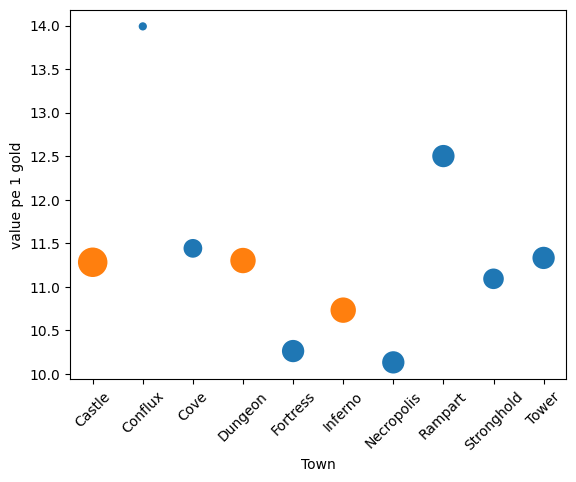

In [417]:
sns.scatterplot(x = 'Town1', y = 'value_cost', data = df6, size = 'ecart', sizes = (50,500), legend = False, hue = 'pos-neg')
plt.xticks(rotation=45)
plt.xlabel('Town')
plt.ylabel('value pe 1 gold')

In [418]:
dftest.columns

Index(['Name', 'Town', 'Level', 'Att', 'Def', 'D-', 'D+', 'HP', 'Spd', 'Grw',
       'Val', 'cum_val', 'Cost', 'Resource', 'Special', 'Ranged', 'Flyer',
       'no_retaliation', 'Upgraded', 'AI Value', 'Fight Value', 'multi_att',
       'poison', 'immunity', 'resistance', 'caster', 'dmg', 'attdef', 'diff_',
       'val_per_gold', 'total_value', 'total_val_per_gold'],
      dtype='object')

<Axes: title={'center': 'Sum of all upg, creatures of a Town taken as 1 unit'}, ylabel='Town'>

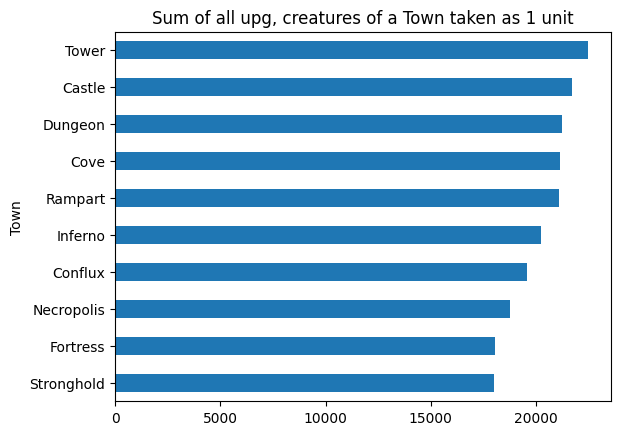

In [430]:
mask_town = (dftest['Upgraded'] == 1) & (dftest['Level'] < 8)

dftest[mask_town].groupby('Town')['cum_val'].sum().sort_values(ascending = True).plot(kind = 'barh', title = 'Sum of all upg, creatures of a Town taken as 1 unit')

In [447]:
df_upg = dftest[['Town', 'Level', 'Val', 'cum_val']]
df_upg.head()

,Town,Level,Val,cum_val
1,Castle,1.5,115,115
3,Castle,2.5,184,299
5,Castle,3.5,448,747
7,Castle,4.5,588,1335
9,Castle,5.5,750,2085


In [456]:
import math
df_upg['log_cum_val'] = df_upg['cum_val'].apply(lambda x: math.log(x))

<Axes: xlabel='Level', ylabel='cum_val'>

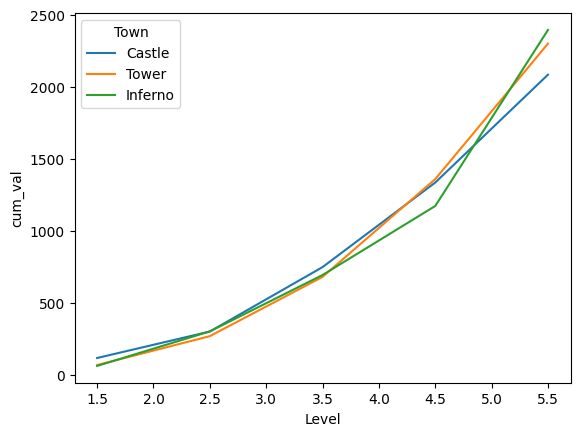

In [468]:
castles_selected = ['Castle', 'Inferno', 'Tower']
pattern_selected = '|'.join(castles_selected)
sns.lineplot(data = df_upg[(df_upg['Town'].str.contains(pattern_selected)) & (df['Level'] < 6)], x = 'Level', y = 'cum_val', hue = 'Town')

<Axes: title={'center': 'Sum of all units of a Town taken as 1 at cost'}, ylabel='Town'>

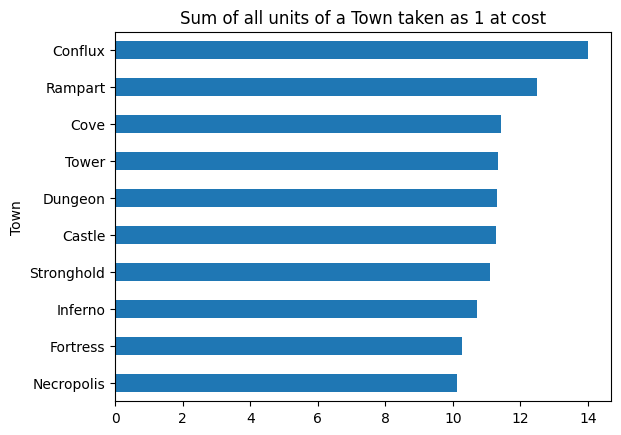

In [420]:
dftest[dftest['Upgraded'] == 1].groupby('Town')['val_per_gold'].sum().sort_values(ascending = True).plot(kind = 'barh', title = 'Sum of all units of a Town taken as 1 at cost')

<Axes: title={'center': 'Value per one week dwelling/gold'}, ylabel='Town'>

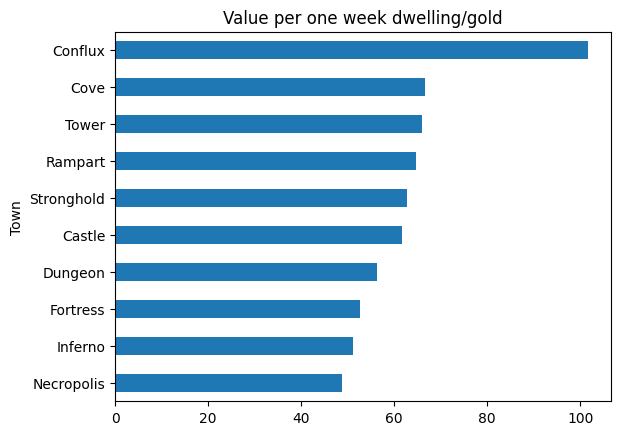

In [421]:
dftest[dftest['Upgraded'] == 1].groupby('Town')['total_val_per_gold'].sum().sort_values(ascending = True).plot(kind = 'barh', title = 'Value per one week dwelling/gold')

<Axes: ylabel='Town'>

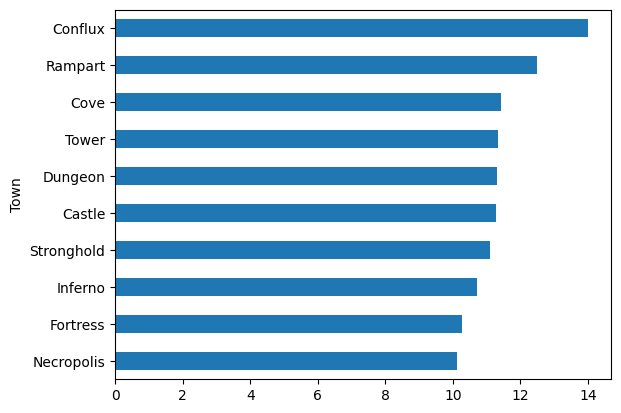

In [422]:
dftest[dftest['Upgraded'] == 1].groupby('Town')['val_per_gold'].sum().sort_values(ascending = True).plot(kind = 'barh')

In [423]:
dftest[dftest['Level'] == 5.5].sort_values(by = 'total_value', axis = 0, ascending = False).head(28)

,Name,Town,Level,Att,Def,D-,D+,HP,Spd,Grw,...,poison,immunity,resistance,caster,dmg,attdef,diff_,val_per_gold,total_value,total_val_per_gold
51,Pit Lord,Inferno,5.5,13,13,13,17,45,7,3,...,0,0.0,0,0,15.0,13.0,14,1.75,3672,5.25
93,Thunderbird,Stronghold,5.5,13,11,11,15,60,11,3,...,0,0.0,0,0,13.0,12.0,27,1.58,3318,4.74
65,Power Lich,Necropolis,5.5,13,10,11,15,40,7,3,...,0,0.1,0,0,13.0,11.5,21,1.80,3237,5.40
79,Minotaur King,Dungeon,5.5,15,15,12,20,50,8,3,...,0,0.0,0,0,16.0,15.0,20,1.86,3204,5.57
107,Mighty Gorgon,Fortress,5.5,11,16,12,16,70,6,3,...,0,0.0,0,0,14.0,13.5,0,1.71,3084,5.14
37,Master Genie,Tower,5.5,12,12,13,16,40,11,3,...,0,0.0,0,1,14.5,12.0,26,1.57,2826,4.71
135,Sorceress,Cove,5.5,12,9,10,16,35,7,3,...,0,0.0,0,1,13.0,10.5,30,1.51,2556,4.52
23,Dendroid Soldier,Rampart,5.5,9,12,10,14,65,4,3,...,0,0.0,0,0,12.0,10.5,5,1.89,2409,5.67
9,Zealot,Castle,5.5,12,10,10,12,30,7,3,...,0,0.0,0,0,11.0,11.0,50,1.67,2250,5.00
121,Magma Elemental,Conflux,5.5,11,11,6,10,40,6,4,...,0,0.1,0,1,8.0,11.0,0,0.98,1960,3.92


In [424]:
df[df['Level'] == 7.5].sort_values(by = 'diff_', axis = 0, ascending = False).head(28)

,Name,Town,Level,Att,Def,D-,D+,HP,Spd,Grw,...,AI Value,Fight Value,multi_att,poison,immunity,resistance,caster,dmg,attdef,diff_
41,Titan,Tower,7.5,24,24,40,60,300,11,1,...,7500,5000,0.0,0,0.10,0,0,50.0,24.0,50
13,Archangel,Castle,7.5,30,30,50,50,250,18,1,...,8776,6033,0.0,0,0.00,0,1,50.0,30.0,45
69,Ghost Dragon,Necropolis,7.5,19,17,25,50,200,14,1,...,4696,3228,0.0,1,0.10,0,0,37.5,18.0,45
27,Gold Dragon,Rampart,7.5,27,27,40,50,250,16,1,...,8613,6220,0.3,0,0.75,0,0,45.0,27.0,38
55,Arch Devil,Inferno,7.5,26,28,30,40,200,17,1,...,7115,5243,0.0,0,0.00,0,0,35.0,27.0,36
125,Phoenix,Conflux,7.5,21,18,30,40,200,21,2,...,6721,4929,0.3,0,0.25,0,0,35.0,19.5,36
139,Haspid,Cove,7.5,29,20,30,55,300,12,1,...,7220,5554,0.0,1,0.00,0,0,42.5,24.5,30
83,Black Dragon,Dungeon,7.5,25,25,40,50,300,15,1,...,8721,6783,0.3,0,1.00,0,0,45.0,25.0,29
97,Ancient Behemoth,Stronghold,7.5,19,19,30,50,300,9,1,...,6168,5397,0.0,0,0.00,0,0,40.0,19.0,14
111,Chaos Hydra,Fortress,7.5,18,20,25,45,250,7,1,...,5931,5272,0.5,0,0.00,0,0,35.0,19.0,12


<Axes: ylabel='Town'>

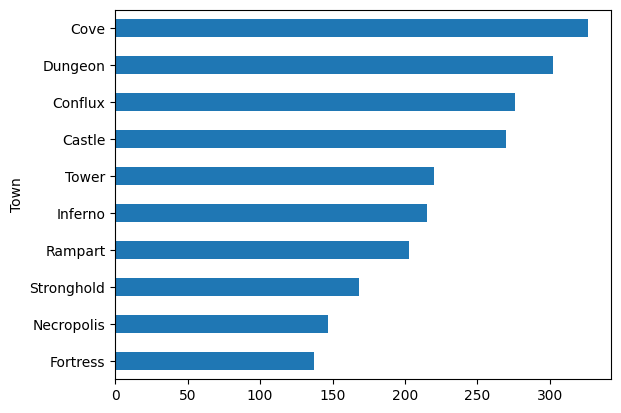

In [425]:
df.groupby('Town')['diff_'].sum().sort_values(ascending = True).plot(kind = 'barh')

In [426]:
df[df['Level']==6.5][['Name', 'dmg']].sort_values(by = 'dmg' ,ascending = False)

,Name,dmg
39,Naga Queen,30.0
11,Champion,22.5
67,Dread Knight,22.5
25,War Unicorn,20.0
53,Efreet Sultan,20.0
109,Wyvern Monarch,20.0
123,Magic Elemental,20.0
137,Nix Warrior,20.0
95,Cyclops King,18.0
81,Scorpicore,17.0


In [476]:
n=0.5 + 4

ss = df[df['Level']==n][['Name', 'AI Value', 'diff_','Spd']].sort_values(by = 'Spd' ,ascending = False)
scaler = StandardScaler()
ss_scaled = scaler.fit_transform(ss[['Spd']])
ss['scaled'] = ss_scaled
ss.sort_values(by='scaled', ascending=False)

,Name,AI Value,diff_,Spd,scaled
21,Silver Pegasus,532,27,12,1.960631
133,Ayssid,645,35,11,1.504670
63,Vampire Lord,783,20,9,0.592749
119,Energy Elemental,470,31,8,0.136788
35,Arch Mage,680,46,7,-0.319173
105,Greater Basilisk,714,27,7,-0.319173
7,Crusader,588,0,6,-0.775133
49,Horned Demon,480,0,6,-0.775133
77,Medusa Queen,577,36,6,-0.775133
91,Ogre Mage,672,0,5,-1.231094


<Axes: ylabel='Town'>

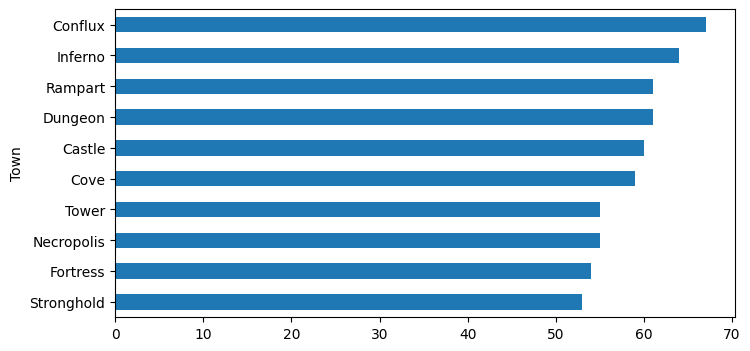

In [483]:
df[((df['Level']/0.5) % 2 == 1) & (df['Level'] < 86)].groupby('Town')['Spd'].sum().sort_values(ascending=True).plot(kind = 'barh',figsize = (8,4))

In [429]:
df.head()

,Name,Town,Level,Att,Def,D-,D+,HP,Spd,Grw,...,AI Value,Fight Value,multi_att,poison,immunity,resistance,caster,dmg,attdef,diff_
0,Pikeman,Castle,1.0,4,5,1,3,10,4,14,...,80,100,0.0,0,0.03,0,0,2.0,4.5,-20
1,Halberdier,Castle,1.5,6,5,2,3,10,5,14,...,115,115,0.0,0,0.03,0,0,2.5,5.5,0
2,Archer,Castle,2.0,6,3,2,3,10,4,9,...,126,115,0.0,0,0.00,0,0,2.5,4.5,10
3,Marksman,Castle,2.5,6,3,2,3,10,6,9,...,184,115,1.0,0,0.00,0,0,2.5,4.5,60
4,Griffin,Castle,3.0,8,8,3,6,25,6,7,...,351,324,0.0,0,0.00,0,0,4.5,8.0,8
